In [6]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


## 切片、提取、赋值、索引
### 1. 用筛法产生素数判别组：

In [6]:
is_prime = np.ones((100,), dtype=bool)
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    is_prime[2*j::j]=False
(is_prime[17],
is_prime[18])

(True, False)

### 2. Using boolean masks：

In [7]:
np.random.seed(3)
a = np.random.randint(0, 20, 15)
mask = (a % 3 == 0)
extract_from_a = a[mask]
extract_from_a

array([ 3,  0,  9,  6,  0, 12])

In [9]:
a[a % 3 == 0] = -1
a

array([10, -1,  8, -1, 19, 10, 11, -1, 10, -1, -1, -1,  7, 14, 17])

#### 组合 #1 #2:

In [12]:
a = np.arange(100)
is_prime = np.ones((100,), dtype=bool)
N_max = int(np.sqrt(len(is_prime)))
for j in range(2, N_max):
    is_prime[2*j::j]=False
primes = a[is_prime]
primes

array([ 0,  1,  2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47,
       53, 59, 61, 67, 71, 73, 79, 83, 89, 97])

## 运算
### 1. 按行、列求和

In [14]:
x = np.array([[1,1],[2,2]])
x

array([[1, 1],
       [2, 2]])

In [15]:
x.sum(axis=0)  # 按列求和，即一列列地求和

array([3, 3])

In [16]:
x.sum(axis=1)  # 按行求和，即一行行地求和

array([2, 4])

### 2. Broadcasting 
#### 求城市两两之间的距离

In [3]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])  # 广播
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])

#### 求 $10\times 10$ 网格上某格点到原点的距离

In [4]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
distance = np.sqrt(x ** 2 + y ** 2)  # 广播
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

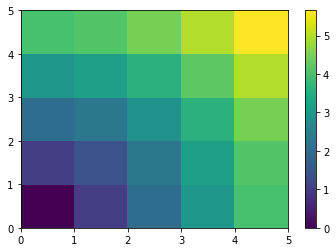

In [7]:
plt.pcolor(distance)
plt.colorbar()

##### 使用numpy.ogrid简化

In [8]:
x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [10]:
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

##### 使用numpy.mgrid提供完整的（广播后的）矩阵

In [12]:
x, y = np.mgrid[0:4, 0:4]

In [13]:
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [14]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

## Maskedarray
### 1. 处理缺失数据

In [15]:
x = np.ma.array([1, 2, 3, 4], mask=[0, 1, 0, 1])
x

masked_array(data=[1, --, 3, --],
             mask=[False,  True, False,  True],
       fill_value=999999)

In [18]:
y = np.ma.array([1, 2, 3, 4], mask=[0, 1, 1, 1])
x + y

masked_array(data=[2, --, --, --],
             mask=[False,  True,  True,  True],
       fill_value=999999)

In [19]:
np.ma.sqrt([1, -1, 2, -2])

masked_array(data=[1.0, --, 1.4142135623730951, --],
             mask=[False,  True, False,  True],
       fill_value=1e+20)

## 多项式
#### 1. Polynomials

In [21]:
p = np.poly1d([3, 2, -1])
p(0)

-1

In [22]:
p.roots

array([-1.        ,  0.33333333])

In [23]:
p.order

2

#### 多项式拟合

In [24]:
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 3))

In [25]:
t = np.linspace(0, 1, 200)

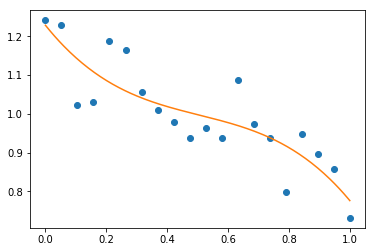

In [26]:
plt.plot(x, y, 'o', t, p(t), '-')